# Plotting 4D Reconstruction using Ion Beam Data 

#### Before you get started make sure that all of these packages have been installed  

In [115]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.interpolate import griddata
from scipy import ndimage
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets


def col(data): 
    x = np.array(data['x'])
    y = np.array(data['y'])
    z = np.array(data['z'])
    i = np.array(data['counts'])
    return [x,y,z,i]

## Step 1: Generate total ion counts data 

#### Input total data file here

In [113]:
total = 'a25274_1 (0) - total.txt'  

#### This part will generate a 4D plot for your total ion counts 

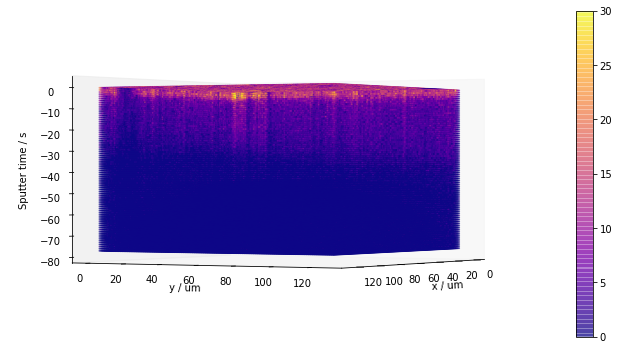

In [114]:
total = pandas.read_csv(total,sep=' ',skiprows=10, header = None)  # Input you total counts file 
total.columns = ['x','y','z','counts']

fig = plt.figure(figsize=(12,6))   # figure size
ax = fig.add_subplot(111, projection='3d')
x = np.flip(col(total)[0])
y = np.flip(col(total)[1])
z = -np.flip(col(total)[2])
c = np.flip(col(total)[3])

img = ax.scatter(x, y, z, c=c,s=1, alpha = 0.5, cmap='plasma',vmin=0,vmax=30)  # change colors with cmap, find more at https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

fig.colorbar(img)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('x / um')   # x-axis label
ax.set_ylabel('y / um')   # y-axis label 
ax.set_zlabel('Sputter time / s',rotation= 90)   # z-axis label
ax.view_init(elev=0,azim=30)  # elev for verticle rotation and azim for horizontal rotation 
ax.grid(False)  # for gridlines remove 'False'
plt.axis('on')  # to axis lines keep 'on'
plt.show() 
fig.savefig('sample_1_total',transparent=True, dpi=600)   # file will save in same folder as the notebook 

## Step 2: Plotting secondary ion of interest 

#### Input your chosen ion data here 

In [119]:
ion = 'a25274_1 (3) - ^6Li+.txt'

C:\Users\nw7g1\Anaconda3_new\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


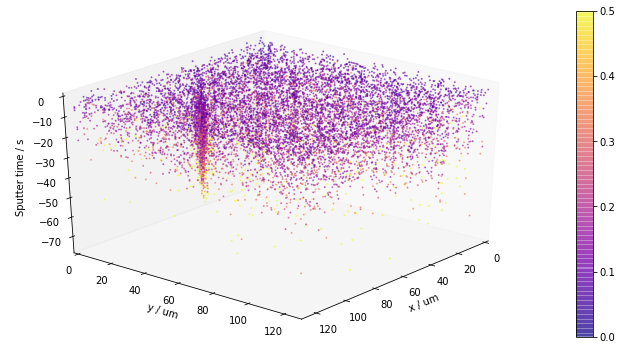

In [120]:
ion = pandas.read_csv(ion,sep=' ',skiprows=10, header = None)
ion.columns = ['x','y','z','counts']
ion['counts'] = np.array(ion['counts'])/( np.array(ion['counts'])+ np.array(total['counts']))
indexNames = ion[ (ion['counts'] == 0)].index
ion.drop(indexNames , inplace=True)
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
x = np.flip(col(Zr)[0])
y = np.flip(col(Zr)[1])
z = -np.flip(col(Zr)[2])
c = np.flip(col(Zr)[3])

img = ax.scatter(x, y, z, c=c,s=1, alpha = 0.5, cmap='plasma',vmin=0,vmax=max(np.nan_to_num(c)))

fig.colorbar(img)
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_xlabel('x / um')
ax.set_ylabel('y / um')
ax.set_zlabel('Sputter time / s',rotation= 90)
ax.set_xlim(0,127)
ax.set_ylim(0,127)
ax.set_zlim(-77,0)
ax.grid(False)  # for gridlines remove 'False'
plt.axis('on')  # to axis lines keep 'on'
ax.view_init(elev=30,azim=40)

plt.show()
fig.savefig('Sample_1_ChoseIon',transparent=True, dpi=600)